In [20]:

import pandas as pd                      # To load the Dataframe
import matplotlib.pyplot as plt          # To visualize the data features i.e. barplot
import seaborn as sns                    # To see the correlation between features using heatmap
 
dataset = pd.read_excel("D:\HousePrice_Prediction\HousePricePrediction.xlsx",engine='openpyxl')
 
# Printing first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [21]:
dataset.shape # show the dimension on the dataset.

(2919, 13)

Data Preprocessing - Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [22]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


Exploratory Data Analysis - EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.
So here let’s make a heatmap using seaborn library.

C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_6208\728198810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

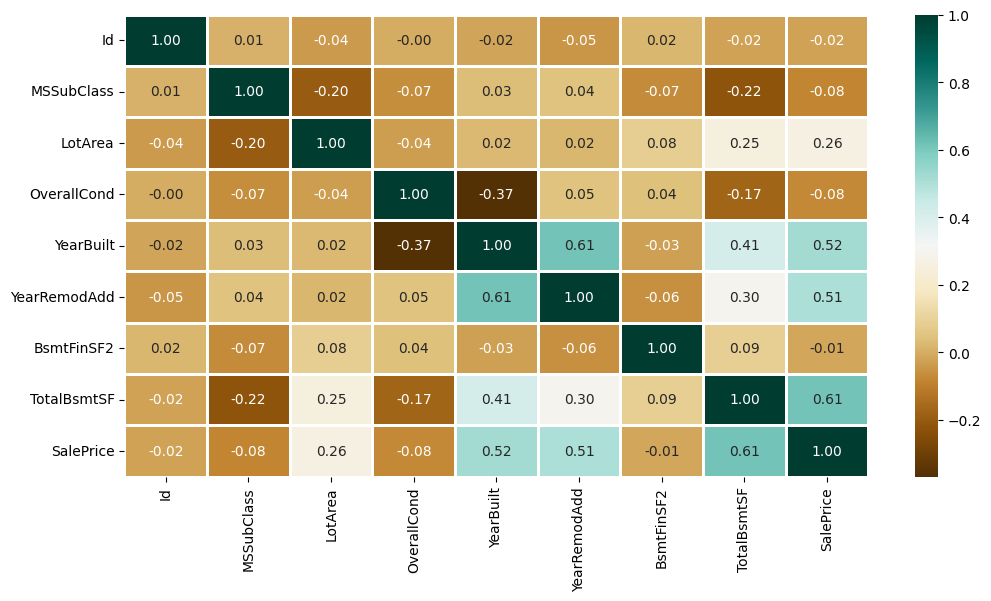

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


Analyzing the different categorical features Let’s draw the barplot.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

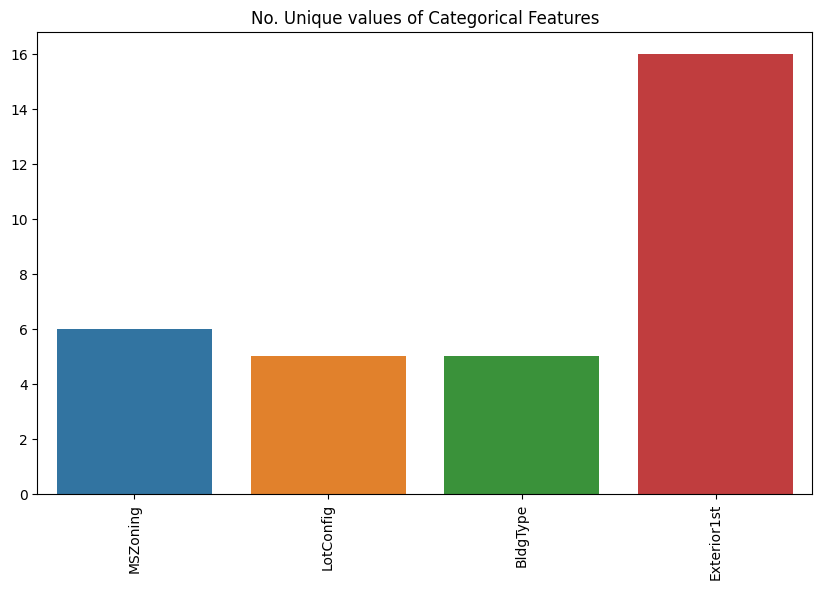

In [24]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category Plotting the bargraph of each four features separately.

C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_6208\1449724743.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


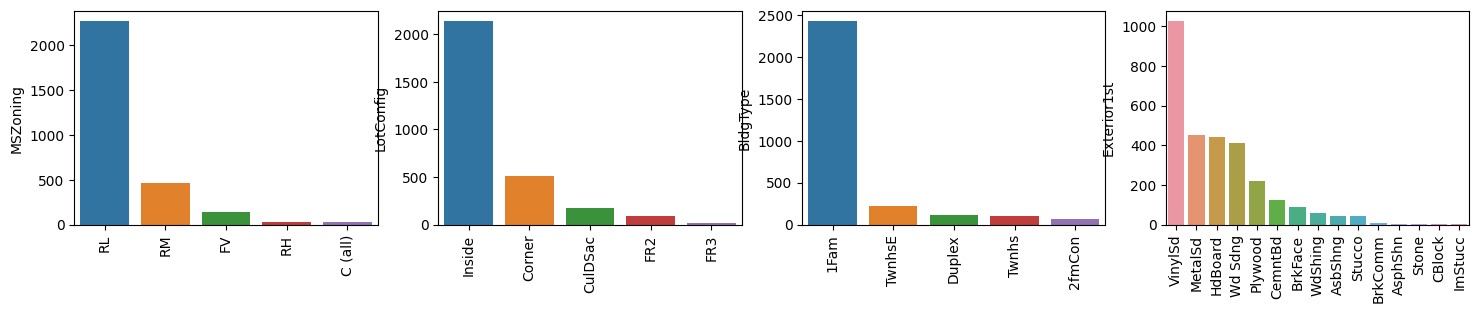

In [25]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


Data Cleaning
Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

We can easily delete the column/row (if the feature or record is not much important).
Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction.

In [26]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [27]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
    dataset['SalePrice'].mean())


Drop records with null values (as the empty records are very less).

In [28]:
new_dataset = dataset.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [29]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

OneHotEncoder – For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [30]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [31]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

c:\Users\Windows 10 Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

Model and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.

SVM-Support Vector Machine
Random Forest Regressor
Linear Regressor
And To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. 

SVM – Support vector Machine
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane. To read more about svm refer this.

In [33]:
from sklearn import svm
from sklearn.svm import SVC

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
model_SVR_r2_score = r2_score(Y_valid, Y_pred)
print(mean_absolute_percentage_error(Y_valid, Y_pred))
model_SVR_r2_score

0.1870512931870423


1.6224524168606536e-06

Random Forest Regression
Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks. To read more about random forests refer this.

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
model_RFR_r2_score = r2_score(Y_valid, Y_pred)
mean_absolute_percentage_error(Y_valid, Y_pred)
r2_score(Y_valid, Y_pred)
model_RFR_r2_score

0.2631008804849849

Random Forest Regression has a highest mean absolute percentage error also the r2 score cannot be used in random forest regressor.

Linear Regression
predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc. 

In [35]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
model_LR_r2_score = r2_score(Y_valid, Y_pred)
model_LR_mean = mean_absolute_percentage_error(Y_valid, Y_pred)
model_LR_mean
model_LR_r2_score

0.3741422704574452

CatBoost Classifier
CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library. 

In [36]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)
cb_r2_score=r2_score(Y_valid, preds)
cb_model_mean = mean_absolute_percentage_error(Y_valid, Y_pred)
cb_model_mean
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 2.28ms	remaining: 2.28s
1:	learn: 55780.1567575	total: 3.85ms	remaining: 1.92s
2:	learn: 55060.9599505	total: 5.41ms	remaining: 1.8s
3:	learn: 54456.1126921	total: 9.09ms	remaining: 2.26s
4:	learn: 53901.1464265	total: 11.2ms	remaining: 2.22s
5:	learn: 53334.6062357	total: 13.1ms	remaining: 2.17s
6:	learn: 52824.4943646	total: 15.8ms	remaining: 2.24s
7:	learn: 52381.4267520	total: 17.9ms	remaining: 2.23s
8:	learn: 51841.0364316	total: 19.8ms	remaining: 2.18s
9:	learn: 51281.5852560	total: 21.5ms	remaining: 2.13s
10:	learn: 50825.3817438	total: 25.2ms	remaining: 2.27s
11:	learn: 50477.2609796	total: 27.3ms	remaining: 2.24s
12:	learn: 50081.4097641	total: 29.2ms	remaining: 2.22s
13:	learn: 49663.6380360	total: 32.6ms	remaining: 2.29s
14:	learn: 49334.5782662	total: 34.4ms	remaining: 2.26s
15:	learn: 48967.5221026	total: 36ms	remaining: 2.21s
16:	learn: 48676.4063222	total: 39ms	remaining: 2.25s
17:	learn: 48359.1169955	total: 4

0.38351169878113034

In [37]:
import xgboost as xgb
from sklearn.metrics import r2_score

# import XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, Y_train)
Y_pred = xgb_model.predict(X_valid)
xgb_r2_score = r2_score(Y_valid, Y_pred)
xgb_model_mean = mean_absolute_percentage_error(Y_valid, Y_pred)
xgb_model_mean
print("XGBoost R-squared score:", xgb_r2_score)



XGBoost R-squared score: 0.2294735600230341


Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx better try XGBoost and instead found that CatBoostRegressor is better than XGBoost when comparing the Coefficient of Determination-R2 score Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model. R2 indicates the proportion of data points which lie within the line created by the regression equation. A higher value of R2 is desirable as it indicates better results.

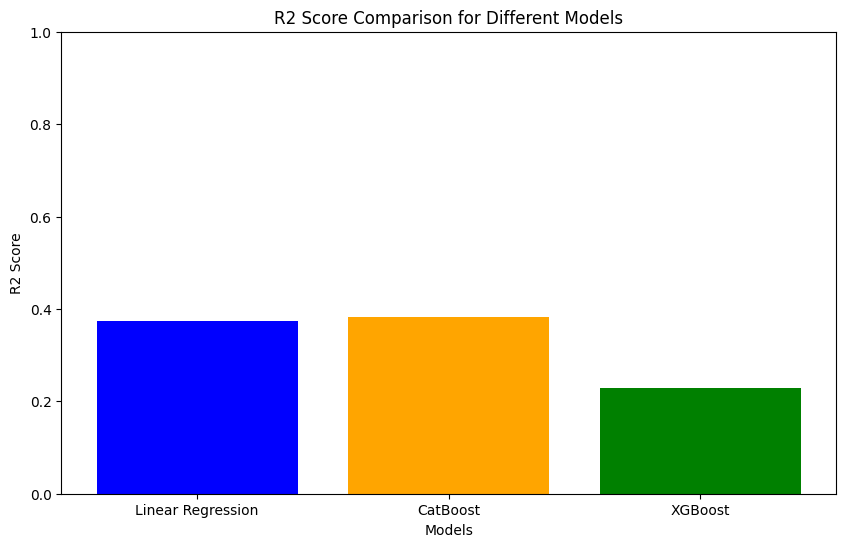

In [38]:
# Data for visualization
models = ['Linear Regression','CatBoost','XGBoost']
r2_scores = [model_LR_r2_score,cb_r2_score,xgb_r2_score]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison for Different Models')
plt.ylim(0, 1)
plt.show()

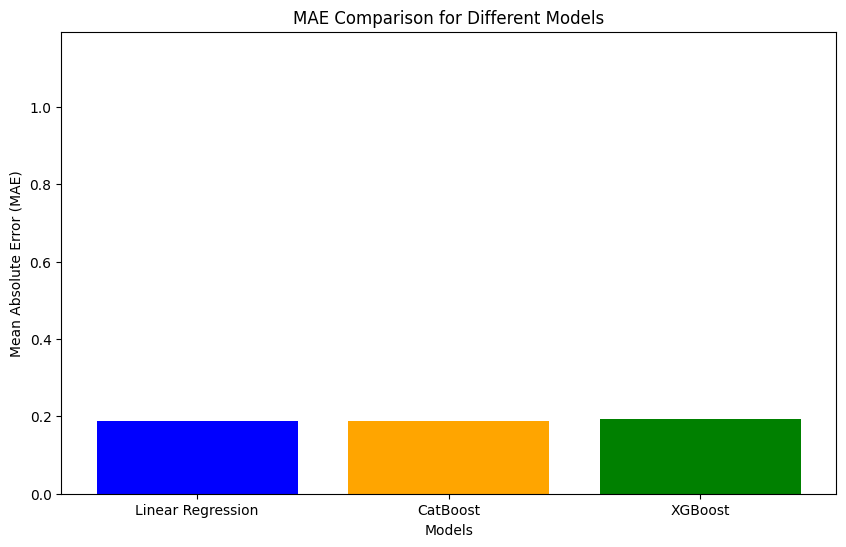

In [39]:
# Data for visualization
models = ['Linear Regression', 'CatBoost', 'XGBoost']
mae_scores = [model_LR_mean,cb_model_mean,xgb_model_mean]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison for Different Models')
plt.ylim(0, max(mae_scores) + 1)
plt.show()